In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(Measurement.date)).scalar()
latest_date

'2017-08-23'

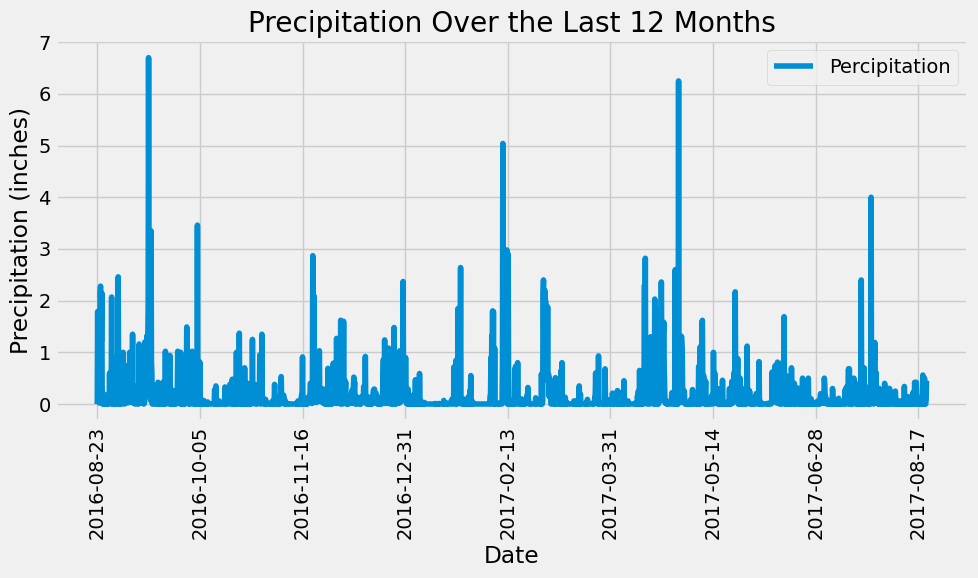

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_data, columns=["Date", "Percipitation"]).sort_values(by="Date")

#drop null values 
prcp_df = prcp_df.dropna()

#set the date column as index 
prcp_df.set_index("Date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(y="Percipitation", figsize=(10,6), legend=True)
plt.title("Precipitation Over the Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=90)
plt.tight_layout()

In [35]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = prcp_df["Percipitation"].describe()

# Print the summary statistics
print(summary_statistics)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Percipitation, dtype: float64


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).count()
total_stations

9

In [44]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations =session.query(Measurement.station, func.count(Measurement.station))\
                        .group_by(Measurement.station)\
                        .order_by(func.count(Measurement.station).desc())\
                        .all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(lowest_temp, highest_temp, average_temp)

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


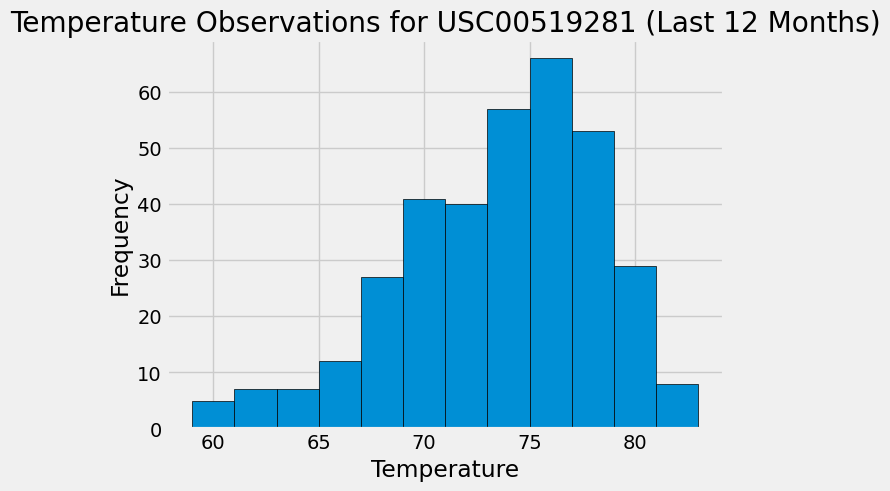

In [58]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Calculate the date one year from the last date in data set.
tobs_data = session.query(Measurement.tobs, Measurement.date).filter(Measurement.date>= '2016-08-23', Measurement.station == 'USC00519281').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
tobs_df = pd.DataFrame(tobs_data, columns=["Temperature", "Date"]).sort_values(by="Date")

#drop null values
tobs_df = tobs_df.dropna()

#Set date column as index
tobs_df.set_index("Date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.hist(tobs_df["Temperature"], bins=12, edgecolor='black')
plt.title("Temperature Observations for USC00519281 (Last 12 Months)")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



# Close Session

In [59]:
# Close Session
session.close()